In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
import datetime as dt


#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns


# ML Matrix + Performance params
from sklearn.metrics import f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Fixing Balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from collections import Counter
from imblearn.pipeline import Pipeline


#Load the ML Algos
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB

# Other
import os
from itertools import cycle

In [2]:
#Scaler Function
# example of a normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

def scaler_data(data,scale_used):
    return scale_used.fit_transform(data)

In [3]:
df = pd.read_csv('terraclimate2015_2021_18_features.csv').drop('Unnamed: 0',axis=1)

In [4]:
df.head()

,decimalLatitude,decimalLongitude,cluster,occurrenceStatus,key,aet_mean,def_mean,pdsi_mean,pet_mean,ppt_mean,...,soil_mean,srad_mean,tmax_mean,tmax_station_influence_mean,tmin_mean,tmin_station_influence_mean,vap_mean,vap_station_influence_mean,vpd_mean,ws_mean
0,-38.045122,145.326047,0,0,0,56.800000,50.650000,-3.528333,107.366667,60.483333,...,63.250000,177.933333,20.258334,1.6,10.265002,1.6,1.140833,1.566667,0.660833,4.970000
1,-38.030947,145.432053,0,0,1,65.516667,37.633333,-3.903333,103.100000,72.216667,...,104.983333,177.700000,19.766668,1.6,9.493335,1.6,1.111167,1.566667,0.618000,4.785000
2,-38.088716,145.722909,0,0,2,60.750000,42.266667,-3.830000,102.966667,65.466667,...,87.583333,178.516667,20.306668,1.6,9.586668,1.6,1.134833,1.566667,0.646667,4.391667
3,-37.807553,145.263607,0,0,3,61.066667,47.650000,-3.056666,108.716667,67.433333,...,65.483333,178.200000,20.478335,1.6,9.901668,1.6,1.089667,1.566667,0.714667,4.506667
4,-37.991842,145.118825,0,0,4,49.433333,64.216667,-3.290000,113.550000,52.300000,...,29.666667,179.083333,20.566668,1.6,10.681668,1.6,1.153167,1.566667,0.682667,5.570000


In [5]:
print(len(df))
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print(len(df))

28536
28496


In [6]:
df.groupby(['cluster','occurrenceStatus']).count()['key']

cluster  occurrenceStatus
0        0                   5141
         1                    146
1        0                   6209
         1                   6804
2        0                    559
         1                   1769
3        0                    133
         1                   1021
4        0                   6714
Name: key, dtype: int64

In [7]:
df.columns

Index(['decimalLatitude', 'decimalLongitude', 'cluster', 'occurrenceStatus',
       'key', 'aet_mean', 'def_mean', 'pdsi_mean', 'pet_mean', 'ppt_mean',
       'ppt_station_influence_mean', 'q_mean', 'soil_mean', 'srad_mean',
       'tmax_mean', 'tmax_station_influence_mean', 'tmin_mean',
       'tmin_station_influence_mean', 'vap_mean', 'vap_station_influence_mean',
       'vpd_mean', 'ws_mean'],
      dtype='object')

In [ ]:
# # X = df[['cluster', 'aet_mean', 'def_mean', 'pdsi_mean', 'pet_mean', 'ppt_mean',
# #        'ppt_station_influence_mean', 'q_mean', 'soil_mean', 'srad_mean',
# #        'tmax_mean', 'tmax_station_influence_mean', 'tmin_mean',
# #        'tmin_station_influence_mean', 'vap_mean', 'vap_station_influence_mean',
# #        'vpd_mean', 'ws_mean']]
# # y = df.occurrenceStatus
# # print(y.value_counts())

# X = df[['def_mean','tmin_mean']]
# y = df.occurrenceStatus
# print(y.value_counts())


In [33]:
source  = df.loc[:, df.columns != 'occurrenceStatus']
target = df[['occurrenceStatus']]

print(target.value_counts())
    
# define pipeline
over = SMOTE(sampling_strategy=0.9)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('u', under), ('o',over)]
pipeline = Pipeline(steps=steps)

# transform the dataset
source_res, target_res = pipeline.fit_resample(source, target)

print(target_res.value_counts())


# # summarize class distribution
# print(target.value_counts())
  
# # define pipeline
# #Oversampling using smote - https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
# smt = SMOTETomek(sampling_strategy = 'auto')
# source_res, target_res = smt.fit_resample(source, target)


# # summarize class distribution
# print(target_res.value_counts())

occurrenceStatus
0                   18756
1                    9740
dtype: int64
occurrenceStatus
0                   12175
1                   10957
dtype: int64


In [36]:
fnl = pd.concat([source_res,target_res],axis=1)

fnl.groupby(['cluster','occurrenceStatus']).count()['key']

cluster  occurrenceStatus
0        0                   3332
         1                    170
1        0                   4051
         1                   7650
2        0                    378
         1                   1996
3        0                     79
         1                   1141
4        0                   4335
Name: key, dtype: int64

In [ ]:
# temp_df.groupby(['cluster','occurrenceStatus']).count()['aet_mean']

In [ ]:
# import seaborn as sns

# sns.pairplot(df[['aet_mean','ppt_mean']])

In [45]:
#Predictor Variables
X = source_res[['aet_mean', 'def_mean', 'pdsi_mean', 'pet_mean', 'ppt_mean',
       'q_mean', 'soil_mean', 'tmax_mean', 'tmin_mean','vap_mean',
       'vpd_mean', 'ws_mean']]    #Change the same in data_unseen

#Target
y = target_res[['occurrenceStatus']]

In [8]:
#Predictor Variables
X = df[['aet_mean', 'def_mean', 'pdsi_mean', 'pet_mean', 'ppt_mean',
       'q_mean', 'soil_mean', 'srad_mean','tmax_mean', 'tmin_mean','vap_mean',
       'vpd_mean', 'ws_mean']]    #Change the same in data_unseen

#Target
y = df[['occurrenceStatus']]

In [9]:
df.columns


Index(['decimalLatitude', 'decimalLongitude', 'cluster', 'occurrenceStatus',
       'key', 'aet_mean', 'def_mean', 'pdsi_mean', 'pet_mean', 'ppt_mean',
       'ppt_station_influence_mean', 'q_mean', 'soil_mean', 'srad_mean',
       'tmax_mean', 'tmax_station_influence_mean', 'tmin_mean',
       'tmin_station_influence_mean', 'vap_mean', 'vap_station_influence_mean',
       'vpd_mean', 'ws_mean'],
      dtype='object')

In [10]:
Z = df[['aet_mean', 'def_mean', 'pdsi_mean', 'pet_mean', 'ppt_mean',
       'q_mean', 'soil_mean', 'srad_mean','tmax_mean', 'tmin_mean','vap_mean',
       'vpd_mean', 'ws_mean']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Z.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Z.values, i)
                          for i in range(len(Z.columns))]
vif_data.sort_values(by='VIF')

,feature,VIF
6,soil_mean,4.869122e+01
2,pdsi_mean,8.602352e+01
12,ws_mean,7.277364e+02
7,srad_mean,2.697815e+03
11,vpd_mean,3.432137e+03
9,tmin_mean,4.545381e+03
5,q_mean,5.348017e+03
8,tmax_mean,7.219019e+03
10,vap_mean,7.315978e+03
4,ppt_mean,1.123089e+05


In [11]:
# # summarize class distribution
# print(y.value_counts())

# # define pipeline
# #Oversampling using smote - https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
# smt = SMOTETomek(sampling_strategy = 'auto')
# X_res, y_res = smt.fit_resample(X, y)


# # summarize class distribution
# print(y_res.value_counts())

In [38]:
X_res, y_res = X , y

In [39]:
X_res.describe()

,aet_mean,def_mean,pdsi_mean,pet_mean,ppt_mean,q_mean,soil_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean
count,23132.000000,23132.000000,23132.000000,23132.000000,23132.000000,23132.000000,23132.000000,23132.000000,23132.000000,23132.000000,23132.000000,23132.000000
mean,69.839163,50.395276,-2.166416,120.209811,82.700833,13.064483,79.162984,23.662159,12.909678,1.412575,0.786278,3.995595
std,16.602875,22.730850,0.604645,12.019377,29.338056,15.200611,54.141898,1.934833,2.055686,0.241027,0.136378,0.640296
min,35.800000,11.933333,-4.051666,93.150000,37.683333,1.983333,6.283333,16.791668,6.318334,0.914667,0.519167,2.388333
25%,53.933333,35.033333,-2.655000,112.550000,58.666667,4.500000,56.833333,23.260002,12.523335,1.344500,0.695500,3.593333
50%,76.283333,40.066667,-2.005000,115.683333,87.016667,12.083333,64.933333,23.541668,12.676668,1.400167,0.722333,3.811667
75%,77.483333,60.766667,-1.965000,123.516667,90.416667,13.183333,74.300000,24.546668,13.320002,1.445167,0.854027,4.503333
max,123.683333,97.650000,0.866667,149.100000,301.516667,177.966667,401.233333,29.778335,21.163335,2.422833,1.107333,6.035000


In [14]:
# # example of a normalization
# from sklearn.preprocessing import MinMaxScaler
# # define data
# data = X_res
# # define min max scaler
# scaler = MinMaxScaler()
# # transform data
# X_scaled = scaler.fit_transform(data)
# print(X_scaled)

In [40]:
y_res = y_res.astype('category')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.20, random_state=56)


# X_train_temp, X_test_temp, y_train, y_test = train_test_split(X_res,y_res, test_size=0.30, random_state=56)
# X_train = scaler_data(X_train_temp,scaler)
# X_test = scaler_data(X_test_temp,scaler)

In [42]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5) 

In [43]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test,y_test)
    print(f"F1 Score: {np.mean(f1_score(y_test, preds)).round(2)}")
    print(f"Accuracy: {np.mean(accuracy_score(y_test, preds)).round(2)}")

In [44]:
#MLP

MLP = MLPClassifier(max_iter=1000)

# mlp_param_grid = {
#     'hidden_layer_sizes': [(50,50),(100)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive']}

# mlp_param_grid = {
#     'hidden_layer_sizes': [(6,18,6)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['adam'],
#     'alpha': [0.0001,0.0005, 0.001],
#     'learning_rate': ['constant','adaptive']}

mlp_param_grid = {
    'hidden_layer_sizes': [(26,39,26)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant']}

gsMLP = GridSearchCV(MLP,param_grid = mlp_param_grid, cv=kfold, scoring="f1", n_jobs= -1, verbose = True)
gsMLP.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.7s remaining:   28.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.4s finished
C:\Users\LR996GB\Anaconda3\envs\frogs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.0001],
                         'hidden_layer_sizes': [(26, 39, 26)],
                         'learning_rate': ['constant'], 'solver': ['adam']},
             scoring='f1', verbose=True)

Best : 0.6894005783500965, using {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (26, 39, 26), 'learning_rate': 'constant', 'solver': 'adam'}
              precision    recall  f1-score   support

           0       0.96      0.63      0.76      2423
           1       0.71      0.97      0.82      2204

    accuracy                           0.80      4627
   macro avg       0.83      0.80      0.79      4627
weighted avg       0.84      0.80      0.79      4627

F1 Score: 0.82
Accuracy: 0.8


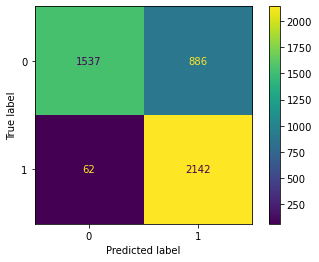

In [46]:
# Summarize the results
MLP_best = gsMLP.best_estimator_
print('Best : {}, using {}'.format(gsMLP.best_score_,gsMLP.best_params_))
report(gsMLP)

In [47]:
gsMLP.best_estimator_

MLPClassifier(hidden_layer_sizes=(26, 39, 26), max_iter=1000)

In [53]:
MLP_best.fit(X,y)

C:\Users\LR996GB\Anaconda3\envs\frogs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(260, 390, 260), max_iter=1000)

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      3780
           1       0.62      0.82      0.71      1920

    accuracy                           0.77      5700
   macro avg       0.75      0.78      0.76      5700
weighted avg       0.80      0.77      0.78      5700

F1 Score: 0.71
Accuracy: 0.77


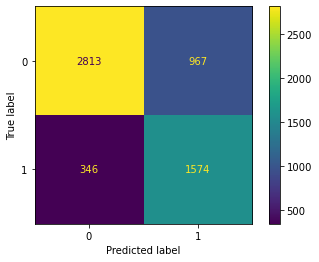

In [29]:
report(MLP_best)

In [48]:
test = pd.read_csv('submission_predictors_terraclimate.csv').drop('Unnamed: 0',axis=1)
test

,id,decimalLatitude,decimalLongitude,occurrenceStatus,aet_mean,def_mean,pdsi_mean,pet_mean,ppt_mean,q_mean,soil_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean
0,0,-37.917146,145.207706,NaN,34.262500,94.183333,-1.266666,128.458333,40.008333,5.787500,19.329167,227.787500,23.284168,9.011668,1.065542,1.043167,3.337917
1,1,-37.750974,144.981501,NaN,34.262500,94.183333,-1.266666,128.458333,40.008333,5.787500,19.329167,227.787500,23.284168,9.011668,1.065542,1.043167,3.337917
2,2,-37.961600,145.348000,NaN,34.262500,94.183333,-1.266666,128.458333,40.008333,5.787500,19.329167,227.787500,23.284168,9.011668,1.065542,1.043167,3.337917
3,3,-37.621300,145.003000,NaN,34.262500,94.183333,-1.266666,128.458333,40.008333,5.787500,19.329167,227.787500,23.284168,9.011668,1.065542,1.043167,3.337917
4,4,-38.498100,145.647000,NaN,34.262500,94.183333,-1.266666,128.458333,40.008333,5.787500,19.329167,227.787500,23.284168,9.011668,1.065542,1.043167,3.337917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,4046,-31.884385,116.150192,NaN,50.529167,81.137500,-1.365000,131.612500,68.616667,18.204167,57.683333,231.645833,23.183335,10.612502,1.150875,1.001042,3.826250
4047,4047,-32.412962,115.779737,NaN,51.320833,88.137500,-2.365833,139.433333,60.000000,8.779167,61.729167,232.704167,24.072918,12.800418,1.356417,0.955208,5.162500
4048,4048,-32.147959,115.856628,NaN,50.991667,89.566667,-2.296666,140.491667,59.062500,8.120833,65.654167,233.208333,24.143335,12.958752,1.334000,0.995583,4.850417
4049,4049,-31.827000,116.238000,NaN,46.254167,86.800000,-1.086250,133.054167,60.600000,14.383333,43.779167,231.712500,23.624585,10.504168,1.139250,1.054083,3.619167


In [51]:
data_unseen = test[['aet_mean', 'def_mean', 'pdsi_mean', 'pet_mean', 'ppt_mean',
       'q_mean', 'soil_mean', 'tmax_mean', 'tmin_mean','vap_mean',
       'vpd_mean', 'ws_mean']]   #Use same column names in X

In [52]:
# #transform data
# data_unseen_Scaled = scaler_data(data_unseen,scaler)
# print(data_unseen_Scaled)

In [53]:
def get_result(model,test_Scaled):
    test_result = model.predict(test_Scaled)
    test.occurrenceStatus = test_result
    print(test.occurrenceStatus.value_counts())

In [54]:
data_unseen

,aet_mean,def_mean,pdsi_mean,pet_mean,ppt_mean,q_mean,soil_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean
0,34.262500,94.183333,-1.266666,128.458333,40.008333,5.787500,19.329167,23.284168,9.011668,1.065542,1.043167,3.337917
1,34.262500,94.183333,-1.266666,128.458333,40.008333,5.787500,19.329167,23.284168,9.011668,1.065542,1.043167,3.337917
2,34.262500,94.183333,-1.266666,128.458333,40.008333,5.787500,19.329167,23.284168,9.011668,1.065542,1.043167,3.337917
3,34.262500,94.183333,-1.266666,128.458333,40.008333,5.787500,19.329167,23.284168,9.011668,1.065542,1.043167,3.337917
4,34.262500,94.183333,-1.266666,128.458333,40.008333,5.787500,19.329167,23.284168,9.011668,1.065542,1.043167,3.337917
...,...,...,...,...,...,...,...,...,...,...,...,...
4046,50.529167,81.137500,-1.365000,131.612500,68.616667,18.204167,57.683333,23.183335,10.612502,1.150875,1.001042,3.826250
4047,51.320833,88.137500,-2.365833,139.433333,60.000000,8.779167,61.729167,24.072918,12.800418,1.356417,0.955208,5.162500
4048,50.991667,89.566667,-2.296666,140.491667,59.062500,8.120833,65.654167,24.143335,12.958752,1.334000,0.995583,4.850417
4049,46.254167,86.800000,-1.086250,133.054167,60.600000,14.383333,43.779167,23.624585,10.504168,1.139250,1.054083,3.619167


In [55]:
X_train

,aet_mean,def_mean,pdsi_mean,pet_mean,ppt_mean,q_mean,soil_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean
3428,39.666667,75.833333,-2.601666,115.433333,41.833333,2.166667,9.616667,20.650002,10.561668,1.140000,0.688833,5.630000
10280,56.816667,43.383333,-3.208333,100.183333,65.083333,7.966667,55.483333,18.658335,10.708335,1.159167,0.536333,5.790000
6726,70.783333,28.266667,-2.393333,99.016667,85.650000,15.100000,129.416667,19.275002,8.636668,1.062833,0.601833,4.275000
19813,88.866667,34.683333,-2.556666,123.516667,102.550000,14.416667,108.100000,26.100002,15.043335,1.705000,0.810333,3.613333
19602,75.583333,42.916667,-2.596666,118.416667,83.300000,8.133333,72.083333,25.420002,13.545001,1.542667,0.827500,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
9338,92.200000,27.350000,-2.126666,119.533333,115.283333,24.483333,137.366667,25.130001,14.868335,1.664667,0.737500,3.645000
13730,77.483333,35.033333,-1.971666,112.550000,90.416667,13.183333,64.933333,23.260002,12.676668,1.400167,0.695500,3.593333
3264,66.216667,43.216667,-1.865000,109.333333,73.216667,7.266667,46.733333,23.053334,11.340002,1.299667,0.727500,2.975000
399,47.100000,93.883333,-2.695000,140.916667,51.400000,4.433333,56.833333,24.546668,13.283335,1.344500,1.040833,4.503333


In [56]:
get_result(gsMLP,data_unseen)

0    4051
Name: occurrenceStatus, dtype: int64


In [ ]:
test.iloc[:,:4].to_csv('feature_samp_aet_pdsi_soil_ppt_tmin_vpd_ws_18_54_18.csv')